# COMP 6934 - Assignment 3
- Professor:       Terrence Tricco
- Term:            Winter 2024
- Student Name:    **Daniel Wiredu**
- Student User:    **dbwiredu**
- Student Email:   dbwiredu@mun.ca
- Student ID:      **202286594**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Squarify has 3 primary function calls that will be required: normalize_sizes(), squarify(), and plot()
import squarify #(Q1–Q3) 
# Circlify has 1 primary function – circlify(). Consult documentation
import circlify #(Q4–Q5)

#needed colors ‘#7c4ea6’, ‘#5094c3’, and ‘#f9c154’

In [2]:
df = pd.read_csv('bbb.csv')
#df.info()
df

,category,value
0,Smart home,101.2
1,Smart home,16.3
2,Smart home,134.0
3,Pet,17.9
4,Pet,17.9
...,...,...
157,Baby and kids,17.9
158,Baby and kids,16.1
159,Baby and kids,88.1
160,Baby and kids,15.6


In [3]:
categories = df.groupby(by='category').sum().reset_index()
categories

,category,value
0,Baby and kids,696.0
1,Bath,813.7
2,Bed,528.5
3,Cleaning and storage,682.8
4,College,695.9
5,Curtains and windows,464.9
6,Dining,730.4
7,Furniture,940.6
8,Health and beauty,808.4
9,Holiday,34.6


## Question 1:

___

(0.0, 180.0, 0.0, 120.0)

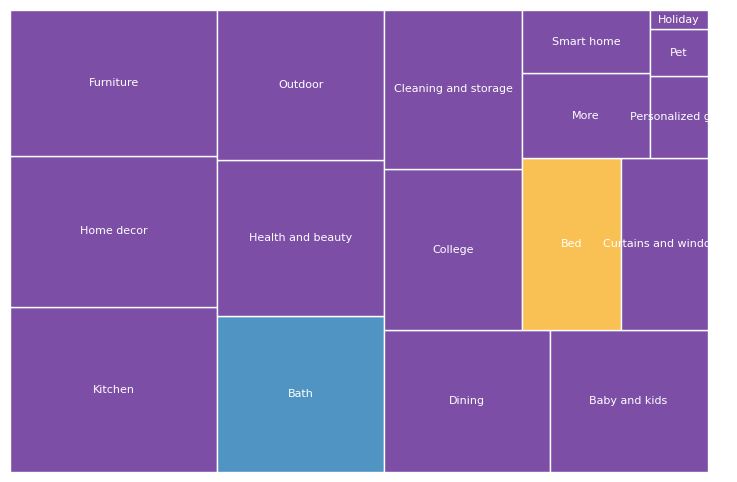

In [4]:
categories = categories.sort_values(by='value', ascending=False)
bb_data = categories['value']
bb_labels = categories['category']
colorlist = ['#7c4ea6']

# create a plot figure with figsize 
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(9,6))

sqf = squarify.plot(sizes=bb_data, label=bb_labels, norm_x=180, norm_y=120, color=colorlist, ec='white', ax=ax, text_kwargs={'fontsize': 8, 'color': 'white', 'wrap': True}) 

for rect in sqf.patches :
    n = rect.get_label()
    if n == 'Bed' :
        rect.set_color('#f9c154')
        rect.set_ec('white')
    if n == 'Bath' :
        rect.set_color('#5094c3')
        rect.set_ec('white')
  
ax.axis('off')

## Question 2:

___

In [5]:
def clear_axis(ax):
    ax.spines[:].set_color('white')
    ax.tick_params(axis='both', bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

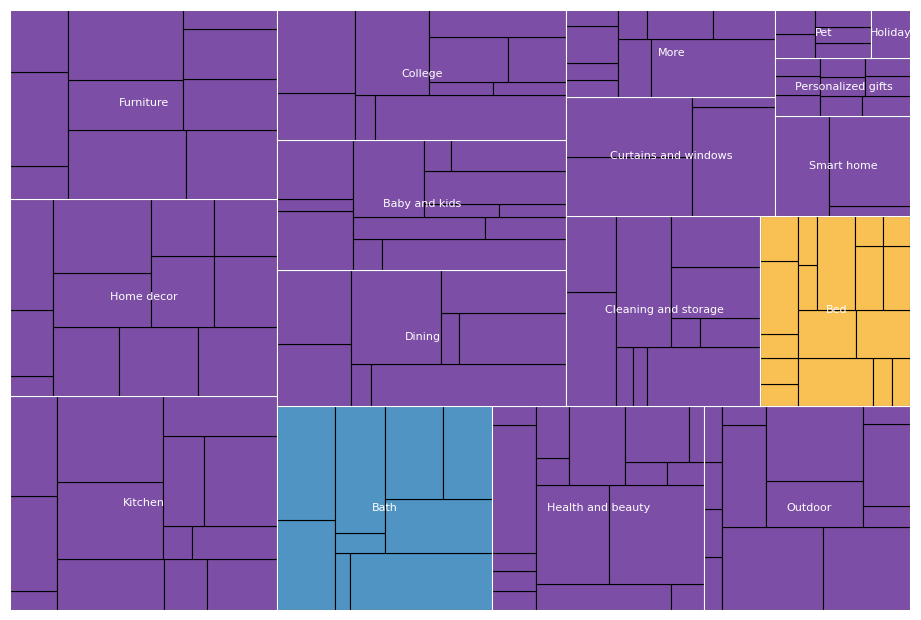

In [6]:
categories = categories.sort_values(by='value', ascending=False)
bb_data = categories['value']
bb_labels = categories['category']
colorlist = ['#7c4ea6']

values = squarify.normalize_sizes(bb_data.to_list(), 1, 1)
rects = squarify.squarify(values, 0, 0, 1, 1)

fig = plt.figure(figsize=(9, 6))

axes = [fig.add_axes([rect['x'], rect['y'], rect['dx'], rect['dy'], ]) for rect in rects]

for i, (ax, rect) in enumerate(zip(axes, rects)):
    category_name = bb_labels.iloc[i]
    if category_name == 'Bed':
        colorlist = ['#f9c154']
    elif category_name == 'Bath':
        colorlist = ['#5094c3']
    else:
        colorlist = ['#7c4ea6']
        
    category_items = df[df['category'] == category_name]['value'].to_list()
    #squarify.plot(sizes=[bb_data.iloc[i]], label=[category_name], color=colorlist, ec='white', norm_x=180, norm_y=120, ax=ax, text_kwargs={'fontsize': 8, 'color': 'white', 'wrap': True}) 
    squarify.plot(sizes=category_items, color=colorlist, ec='black', ax=ax, lw=0.8, bar_kwargs={'alpha':1}) 

    ax.text(rect['x']+50, rect['y']+50, f'{category_name}', ha='center', va='center', fontsize=8, color='white', wrap=True, in_layout=True)
    clear_axis(ax)

## Question 3:

___

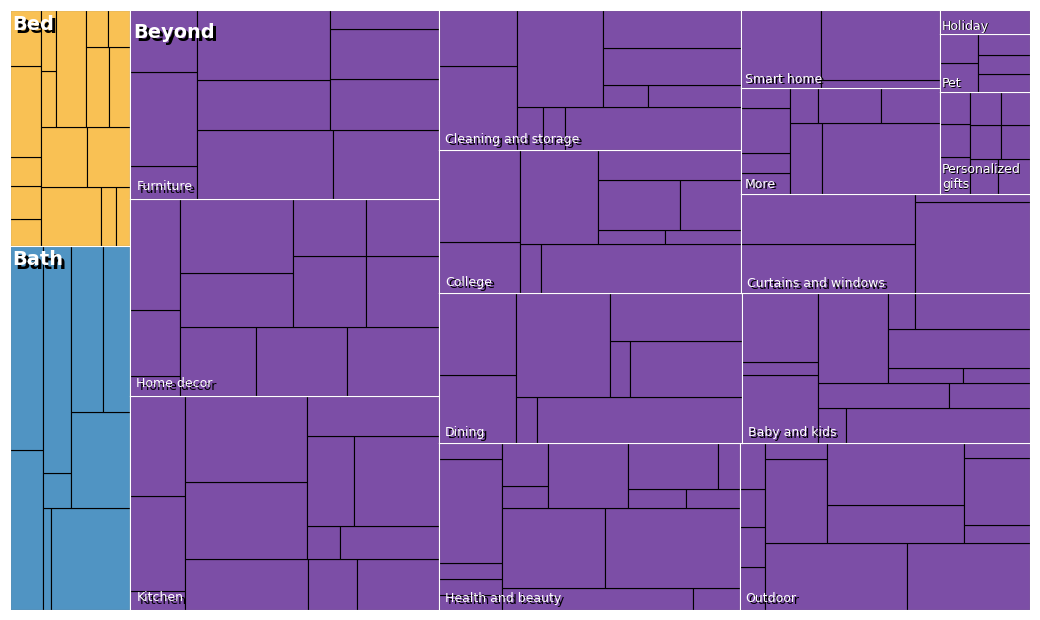

In [7]:
categories = categories.sort_values(by='value', ascending=False)
bb_data = categories['value']
bb_labels = categories['category']
colorlist = ['#7c4ea6']

df['group_name'] = np.where(df['category'] == 'Bed', 'Bed', np.where(df['category'] == 'Bath', 'Bath', 'Beyond'))
groups = df[['group_name','value']].groupby(by='group_name').sum().reset_index()
group_categories = groups['group_name']
group_category_val = groups['value']

values = squarify.normalize_sizes(group_category_val, 1, 1)
rects = squarify.squarify(values, 0, 0, 1, 1)

fig = plt.figure(figsize=(9, 6))
y_text = 0
y_text_shadow = 0
axes = [fig.add_axes([rect['x'], rect['y'], rect['dx'], rect['dy'], ]) for rect in rects]

for i, ax in enumerate(axes):
    group_name = group_categories[i]
    if group_name == 'Bed':
        colorlist = ['#f9c154']
        y_text = 98
        y_text_shadow = 1.5
    elif group_name == 'Bath':
        colorlist = ['#5094c3']
        y_text = 99
        y_text_shadow = 1
    else:
        colorlist = ['#7c4ea6']
    
    #squarify.plot(sizes=[group_category_val[i]], color=colorlist, ec='white', norm_x=100, norm_y=100, ax=ax, text_kwargs={'fontsize': 8, 'color': 'white', 'wrap': True}) 
    
    if group_name == 'Bed' or group_name == 'Bath':
        category_items = df[df['category'] == group_name]['value'].to_list()
        squarify.plot(sizes=category_items, color=colorlist, ec='black', ax=ax, lw=0.8, bar_kwargs={'alpha':1}, norm_x=100, norm_y=100)     
        ax.text(4, y_text-y_text_shadow, f"{group_name}", ha='left', va='top', wrap=True, color='black', fontsize=14, weight='bold')
        ax.text(2, y_text, f"{group_name}", ha='left', va='top', wrap=True, color='white', fontsize=14, weight='bold')
        
    elif group_name == 'Beyond':
        beyond_data = categories[(categories['category'] != 'Bed') & (categories['category'] != 'Bath')]['value']
        beyond_labels = categories[(categories['category'] != 'Bed') & (categories['category'] != 'Bath')]['category']
        
        ax_pos = ax.get_position()
        
        values = squarify.normalize_sizes(beyond_data, 1, 1)
        rects = squarify.squarify(values, ax_pos.x0, 0, 1, 1)
                
        axes2 = [fig.add_axes([rect['x'], rect['y'], rect['dx'], rect['dy'], ]) for rect in rects]
        
        for j, ax2 in enumerate(axes2):
            category_name = beyond_labels.iloc[j]
            #squarify.plot(sizes=[beyond_data.iloc[j]], label=None, color=colorlist, ec='white', norm_x=100, norm_y=100, ax=ax2, text_kwargs={'fontsize': 8, 'color': 'white', 'wrap': True}) 
            ax2.text(3, 1.5, f"{category_name}", ha='left', va='bottom', color='black', fontsize=9, wrap=True, in_layout=True)
            ax2.text(2, 3, f"{category_name}", ha='left', va='bottom', color='white', fontsize=9, wrap=True, in_layout=True)
            
            category_items = df[df['category'] == category_name]['value'].to_list()
            squarify.plot(sizes=category_items, color=colorlist, ec='black', ax=ax2, lw=0.8, bar_kwargs={'alpha':1}) 
            
            clear_axis(ax2)
            if j == 2:
                ax2.text(2, 83.5, f"{group_name}", ha='left', color='black', fontsize=14, weight='bold')
                ax2.text(1, 85, f"{group_name}", ha='left', color='white', fontsize=14, weight='bold')
     
    clear_axis(ax)

## Question 4
___

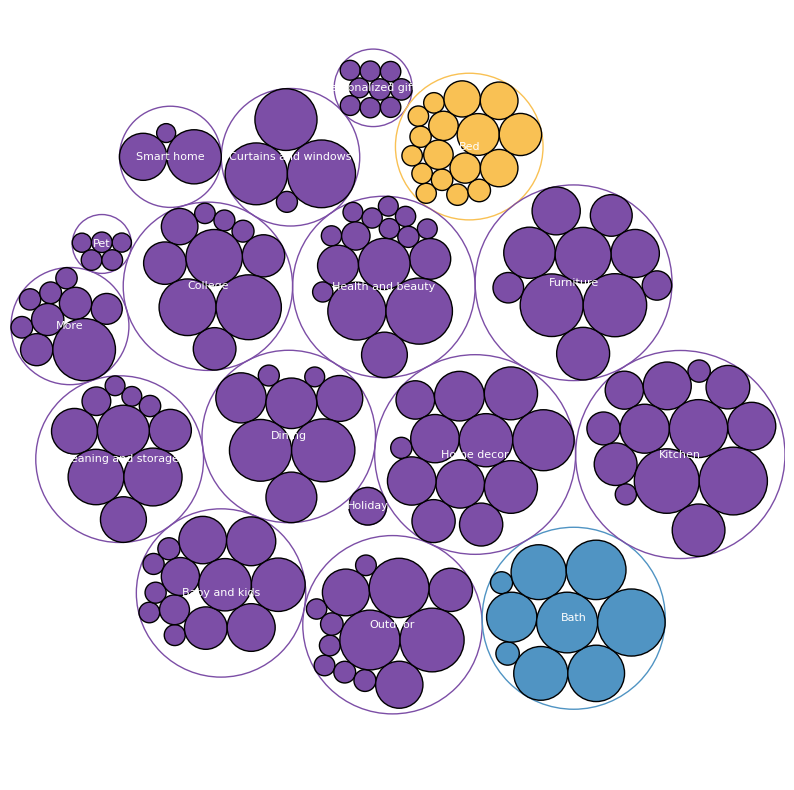

In [8]:
#fetch data and group by categories
main_data = pd.read_csv('bbb.csv')
data = main_data.groupby('category')['value'].sum().reset_index()
category_totals = data
# Mapping of labels to colors
color_map = {
    'Bed': '#f9c154',
    'Bath': '#5094c3',
}

#generate category values as data dictionary for outer circles
data = [{'id': row['category'], 'datum': row['value']} for index, row in data.iterrows()]

#generate category items as children to data dictionary
for i, catt in enumerate(data):
    catt_name = data[i]['id']
    catt['children'] = [{'id': catt_name, 'datum': j} for j in main_data[main_data['category'] == catt_name]['value']]
    
#call circlify function to generate circles
circles = circlify.circlify(data, show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
# Find axis boundaries to ensure all circles fit
lim = max(max( abs(circle.x) + circle.r,abs(circle.y) + circle.r, ) for circle in circles)
    
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

#plotting categories
for circle in circles:    
    if circle.level == 1:  
        x, y, r = circle.x, circle.y, circle.r
        label = circle.ex["id"]
        # Get color from the mapping, default to '#7c4ea6' if label not found
        color = color_map.get(label, '#7c4ea6')
        ax.add_patch(plt.Circle((x, y), r, linewidth=1, edgecolor=color, fill=False))    
        plt.annotate(label, (x, y), va='center', ha='center',color='white', fontsize=8)
        
#plotting category items      
for circle in circles:    
    if circle.level == 2:
        x, y, r = circle.x, circle.y, circle.r
        label = circle.ex["id"]
        # Get color from the mapping, default to '#7c4ea6' if label not found
        color = color_map.get(label, '#7c4ea6')   
        ax.add_patch(plt.Circle((x, y), r, color=color, ec='black', linewidth=1, fill=True))
        
plt.show()

## Question 5
___

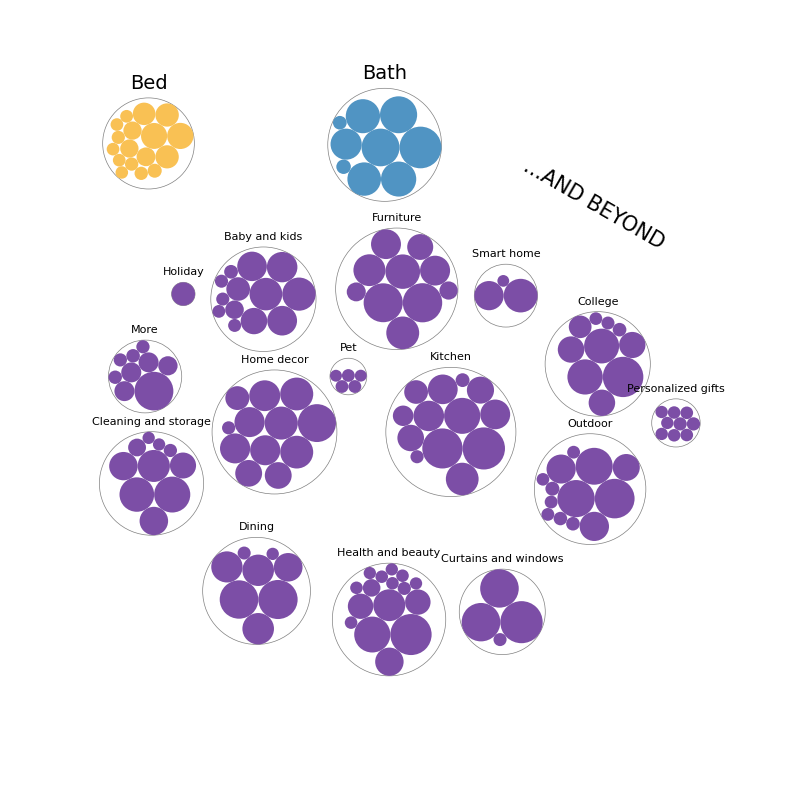

In [9]:
#fetch data and group by categories
main_data = pd.read_csv('bbb.csv')
data = main_data.groupby('category')['value'].sum().reset_index()
category_totals = data
# Mapping of labels to colors
color_map = {
    'Bed': '#f9c154',
    'Bath': '#5094c3',
}

#generate category values as data dictionary for outer circles
data = [{'id': row['category'], 'datum': row['value']} for index, row in data.iterrows()]

#generate category items as children to data dictionary
for i, catt in enumerate(data):
    catt_name = data[i]['id']
    catt['children'] = [{'id': catt_name, 'datum': j} for j in main_data[main_data['category'] == catt_name]['value']]
    
#call circlify function to generate circles
circles = circlify.circlify(data, show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

# Find axis boundaries to ensure all circles fit
lim = max(max( abs(circle.x) + circle.r,abs(circle.y) + circle.r, ) for circle in circles)
lim=lim+0.6
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

#adjustment to circle position on plot
x_pos = {'Bed': -1.2,'Bath': -0.5,'More': -0.2,'Cleaning and storage': -0.3,'Holiday': -0.8,'Baby and kids': -0.1,'Home decor': -0.7,'Dining': -0.3,'Furniture': -0.45,'Pet': 0.55,'Kitchen': -0.5,'Health and beauty': 0.0,'Smart home': 1.02,'College': 1.3,'Outdoor': 0.8,'Curtains and windows': 0.7,'Personalized gifts': 1.2}
y_pos = {'Bed': 0.4,'Bath': 1.6,'More': -0.1,'Cleaning and storage': -0.2,'Holiday': 0.7,'Baby and kids': 0.9,'Home decor': 0.0,'Dining': -0.7,'Furniture': 0.15,'Pet': -0.31,'Kitchen': 0.0,'Health and beauty': -1.2,'Smart home': -0.2,'College': -0.15,'Outdoor': 0.2,'Curtains and windows': -1.5,'Personalized gifts': -0.9}

#plotting categories
for circle in circles:    
    if circle.level == 1:  
        x, y, r = circle.x, circle.y, circle.r
        label = circle.ex["id"]
        # Get color from the mapping, default to '#7c4ea6' if label not found
        color = color_map.get(label, '#7c4ea6')
        ax.add_patch(plt.Circle((x+x_pos[label], y+y_pos[label]), r, linewidth=0.5, edgecolor='grey', fill=False))  
        fs = 8
        if label == 'Bed' or label == 'Bath':
            fs = 14
        plt.annotate(label, (x+x_pos[label], y+r+y_pos[label]+0.02), va='bottom', ha='center',color='black', fontsize=fs)

#plotting category items
for circle in circles:    
    if circle.level == 2:
        x, y, r = circle.x, circle.y, circle.r        
        label = circle.ex["id"]
        # Get color from the mapping, default to '#7c4ea6' if label not found
        color = color_map.get(label, '#7c4ea6')  
        ax.add_patch(plt.Circle((x+x_pos[label], y+y_pos[label]), r, color=color, ec=None, linewidth=1, fill=True))

plt.text(0.5,0.6, '...AND BEYOND', rotation=330, fontsize=15)
plt.show()

## References
- https://python-graph-gallery.com/circular-packing-several-levels-of-hierarchy/
- https://github.com/elmotec/circlify/blob/main/README.md
- https://stackoverflow.com/questions/70316445/circlify-change-the-colour-of-just-one-of-the-circles
- https://python-graph-gallery.com/circular-packing-1-level-hierarchy/